## Modelos baseados em árvores

Nesse notebook, você irá aprender como aplicar modelos baseados em árvores no case de análise de transações fraudulentas de cartões de crédito.

In [1]:
import pandas as pd                      
import matplotlib.pyplot as plt          
import seaborn as sns                    
import numpy as np                        

from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree  
from sklearn import tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

# Leitura e exploração

In [2]:
dados_path = './card_transdata.csv'

dados = pd.read_csv(dados_path)

In [3]:
dados

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [7]:
dados.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

Dtypes e valores nulos ok

In [6]:
print(dados.fraud.value_counts())
print(dados.fraud.value_counts(normalize=True))

0.0    912597
1.0     87403
Name: fraud, dtype: int64
0.0    0.912597
1.0    0.087403
Name: fraud, dtype: float64


Como esperado, há um desbalanceamento grande na variável target, pois fraudes são muito mais raras do que compras normais.

## Correlação

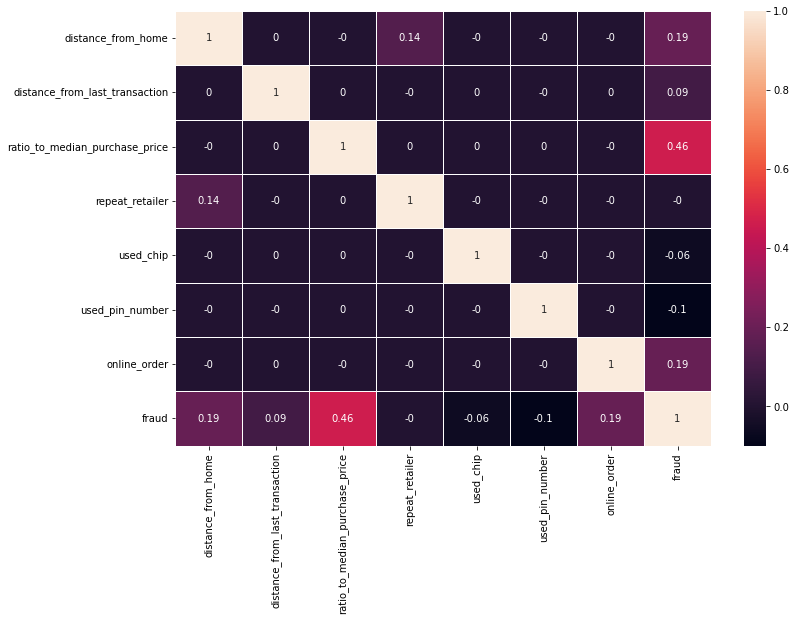

In [10]:
corr_matrix = dados.corr().round(2)

fig, ax = plt.subplots(figsize=(12,8))    
sns.heatmap(data=corr_matrix, annot=True, linewidths=.5, ax=ax)

plt.show()

Possíveis relações: distance from home, ratio to median purchase price e online order

# Criação do modelo

In [11]:
x = dados.drop(columns=['fraud'])
y = dados['fraud']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=7)

## DecisionTree

In [19]:
dt = DecisionTreeClassifier(random_state=7, max_depth=3)

dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=7)

In [20]:
y_pred_dt = dt.predict(x_test)

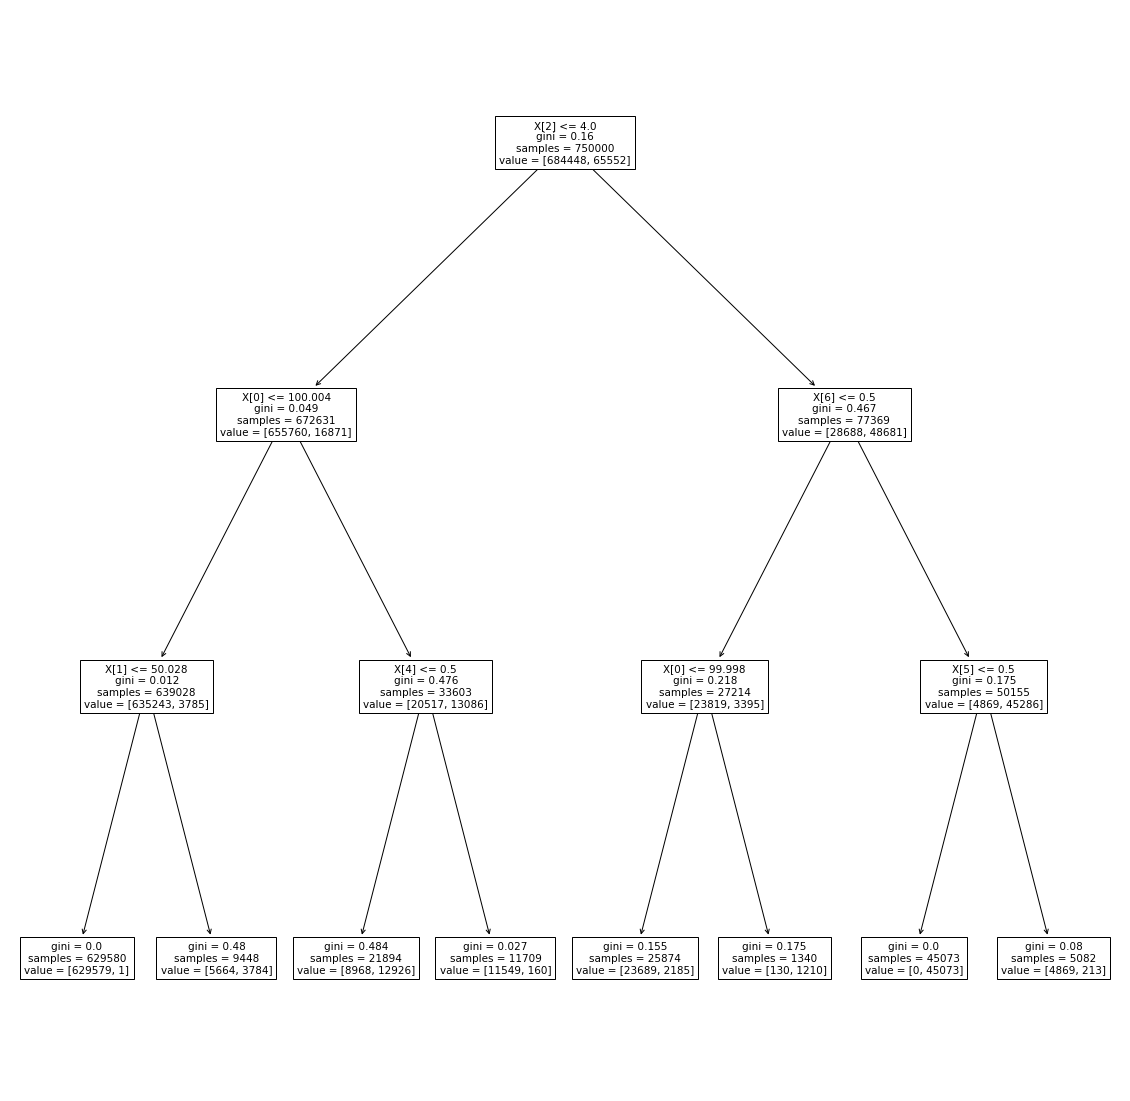

In [27]:
plt.figure(figsize=(20,20))

tree.plot_tree(dt)

plt.show()

In [28]:
dt.classes_

array([0., 1.])

Dessa forma não é possível identiifcar quais são as variáveis

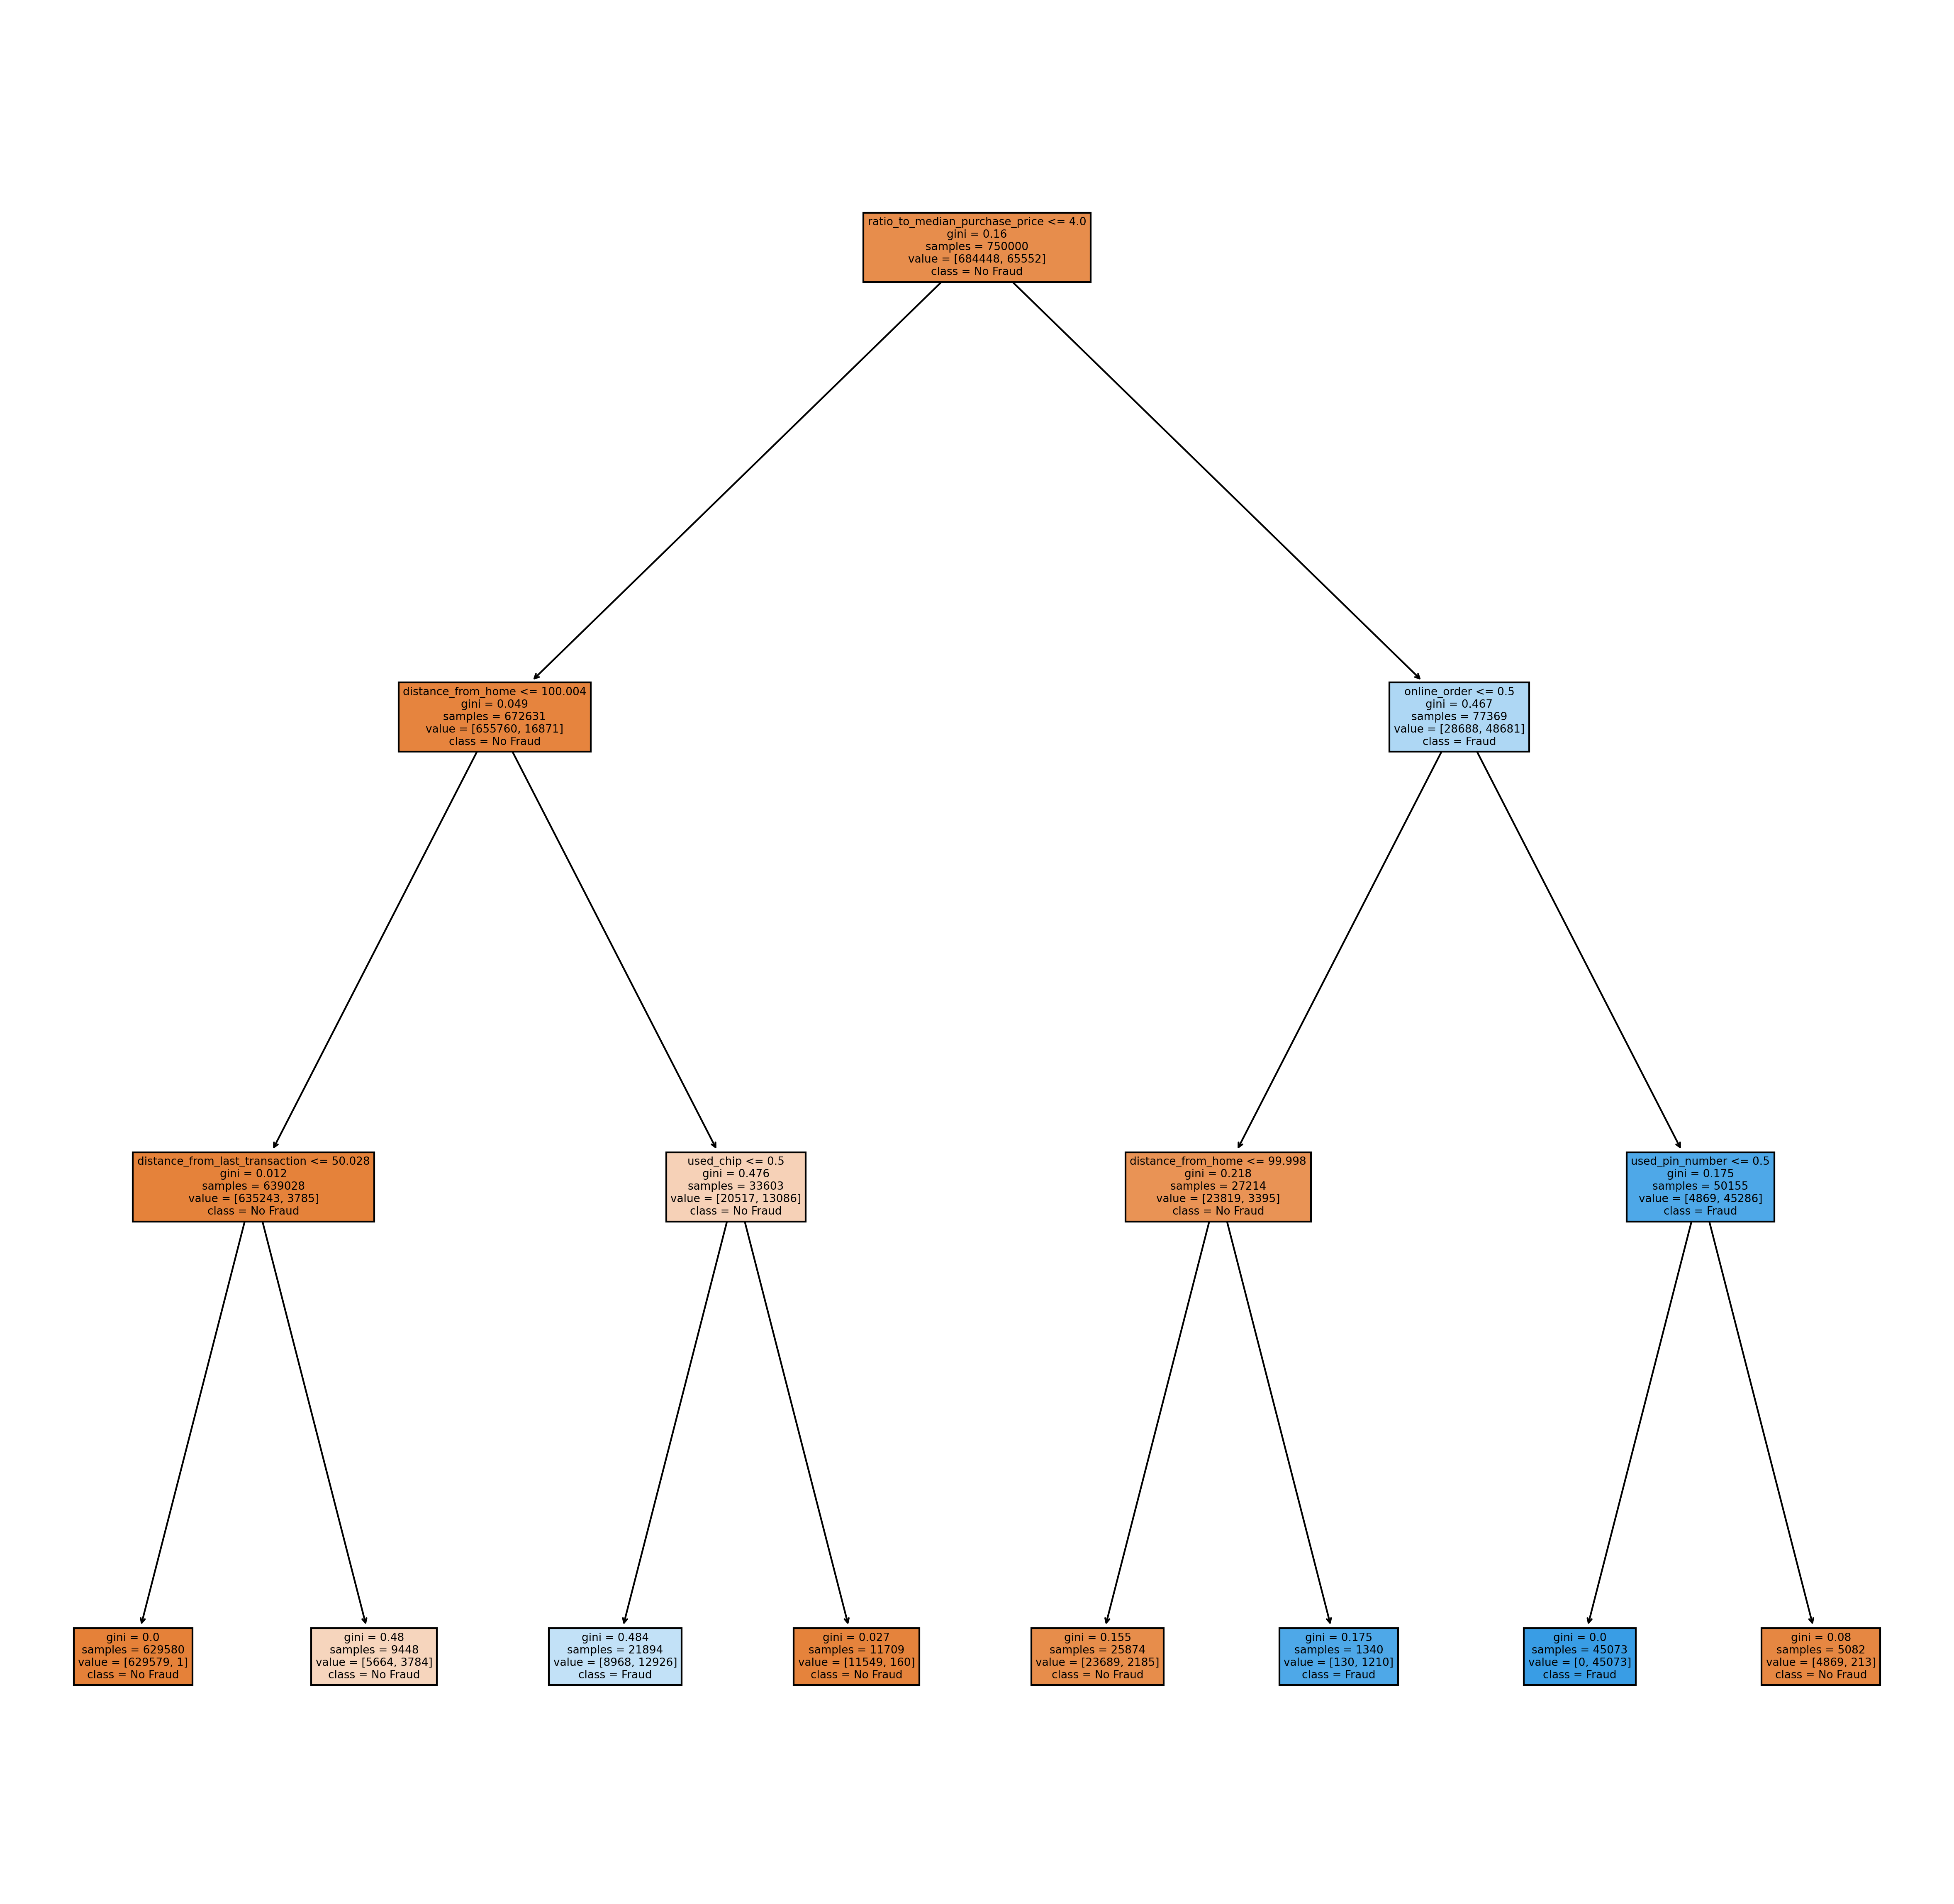

In [29]:
class_names = ['No Fraud','Fraud']
label_names = list(x.columns)

fig, ax = plt.subplots(figsize=(20,20), dpi=300)

tree.plot_tree(dt,
               feature_names=label_names,
               class_names=class_names,
               filled=True)

plt.show()

fig.savefig('./dt_1.png')

In [26]:
print(accuracy_score(y_test, y_pred_dt))

0.979508


In [55]:
confusion_matrix(y_test, y_pred_dt)

array([[225097,   3052],
       [  2071,  19780]], dtype=int64)

## Random Forest

In [39]:
rf = RandomForestClassifier(n_estimators=5, random_state=7, max_depth=3)

In [40]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=5, random_state=7)

In [41]:
estimator = rf.estimators_

print(estimator)

[DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=327741615), DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=976413892), DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1202242073), DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1369975286), DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1882953283)]


In [42]:
y_pred_rf = rf.predict(x_test)

print(y_pred_rf)

[0. 1. 0. ... 0. 0. 0.]


In [43]:
print(accuracy_score(y_test, y_pred_rf))

0.948604


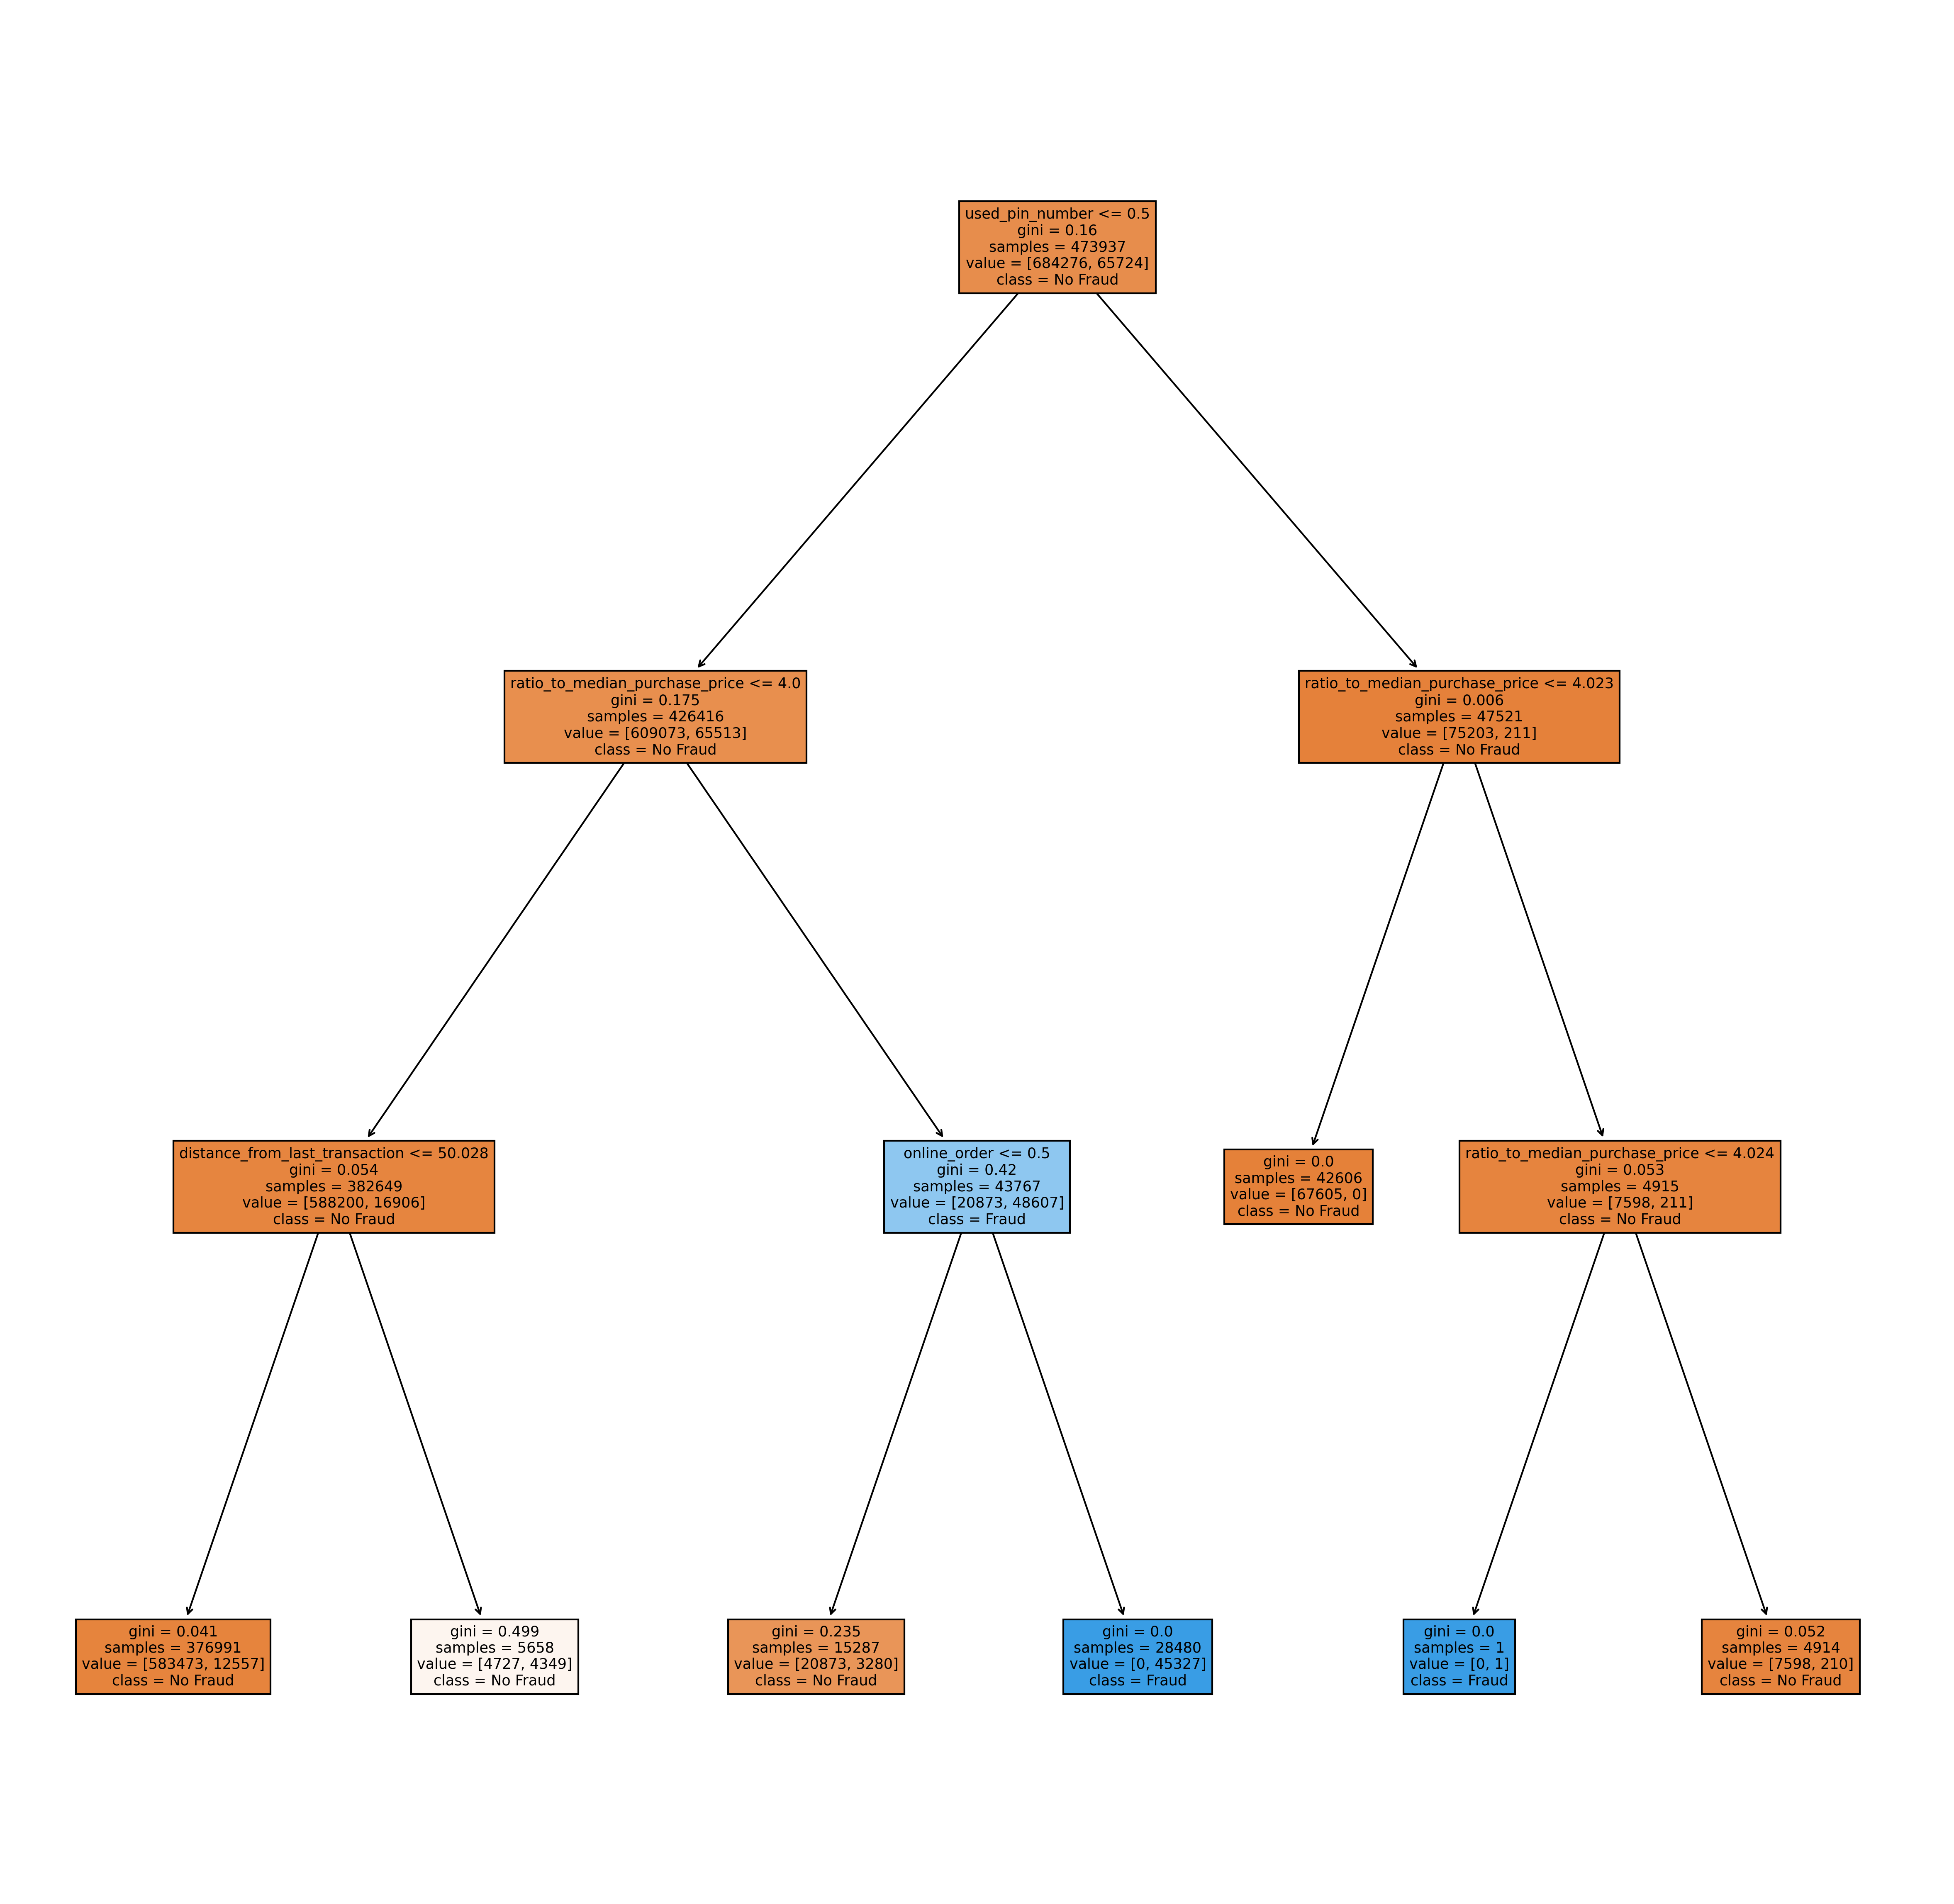

In [44]:
fig, ax = plt.subplots(figsize=(20,20), dpi=300)

tree.plot_tree(estimator[0],
               feature_names=label_names,
               class_names=class_names,
               filled=True)

plt.show()

fig.savefig('./rf_1.png')

Plotando todas as árvores geradas:

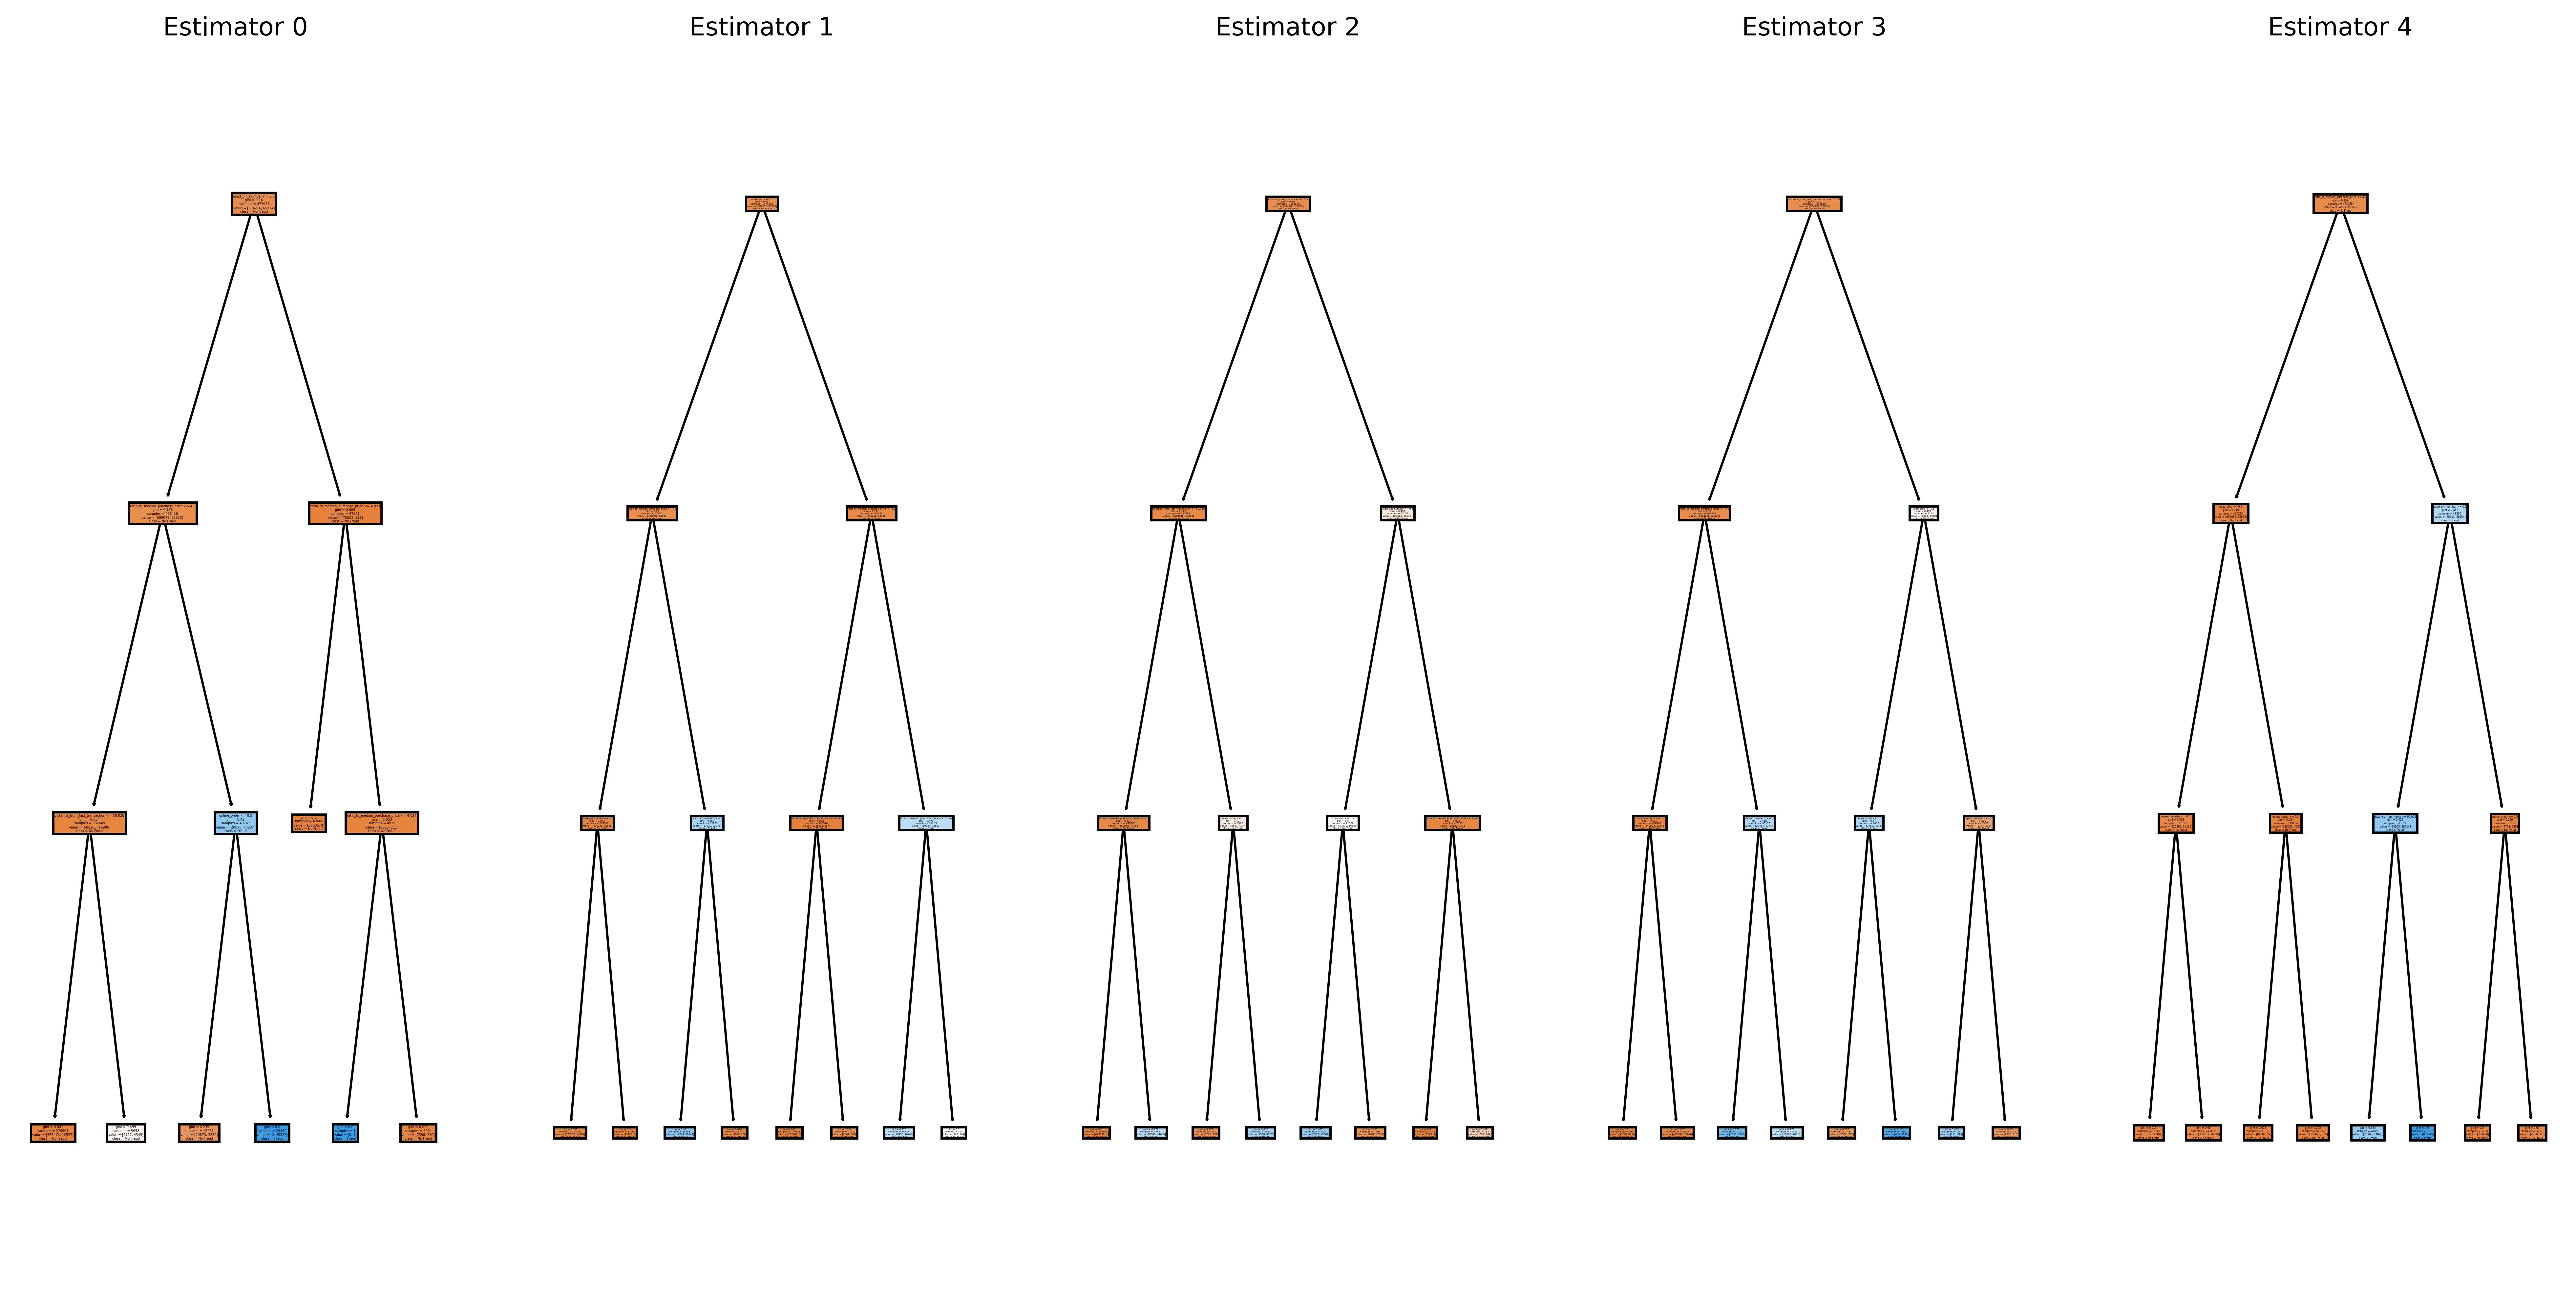

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=len(estimator), figsize=(20,10), dpi=500)

for i in range(0,5):
    tree.plot_tree(estimator[i],
               feature_names=label_names,
               class_names=class_names,
               filled=True,
               ax = ax[i])

    ax[i].set_title(f'Estimator {i}', fontsize=11)

fig.savefig('./rf_all.png')

In [47]:
print(rf.score(x_train, y_train))
print(rf.score(x_test, y_test))

0.948124
0.948604


In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
confusion_matrix(y_test, y_pred_rf)

array([[221176,   6973],
       [  5876,  15975]], dtype=int64)